Exploring the data

In [29]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
DATASET_PATH = '../../../../data/raw/breast_cancer.csv'
data = pd.read_csv(DATASET_PATH)

In [10]:
data.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [12]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
#Label value count
data['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [9]:
#Check if the dataset contain null values
data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [11]:
#Check the data type of each value in the dataset
data.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

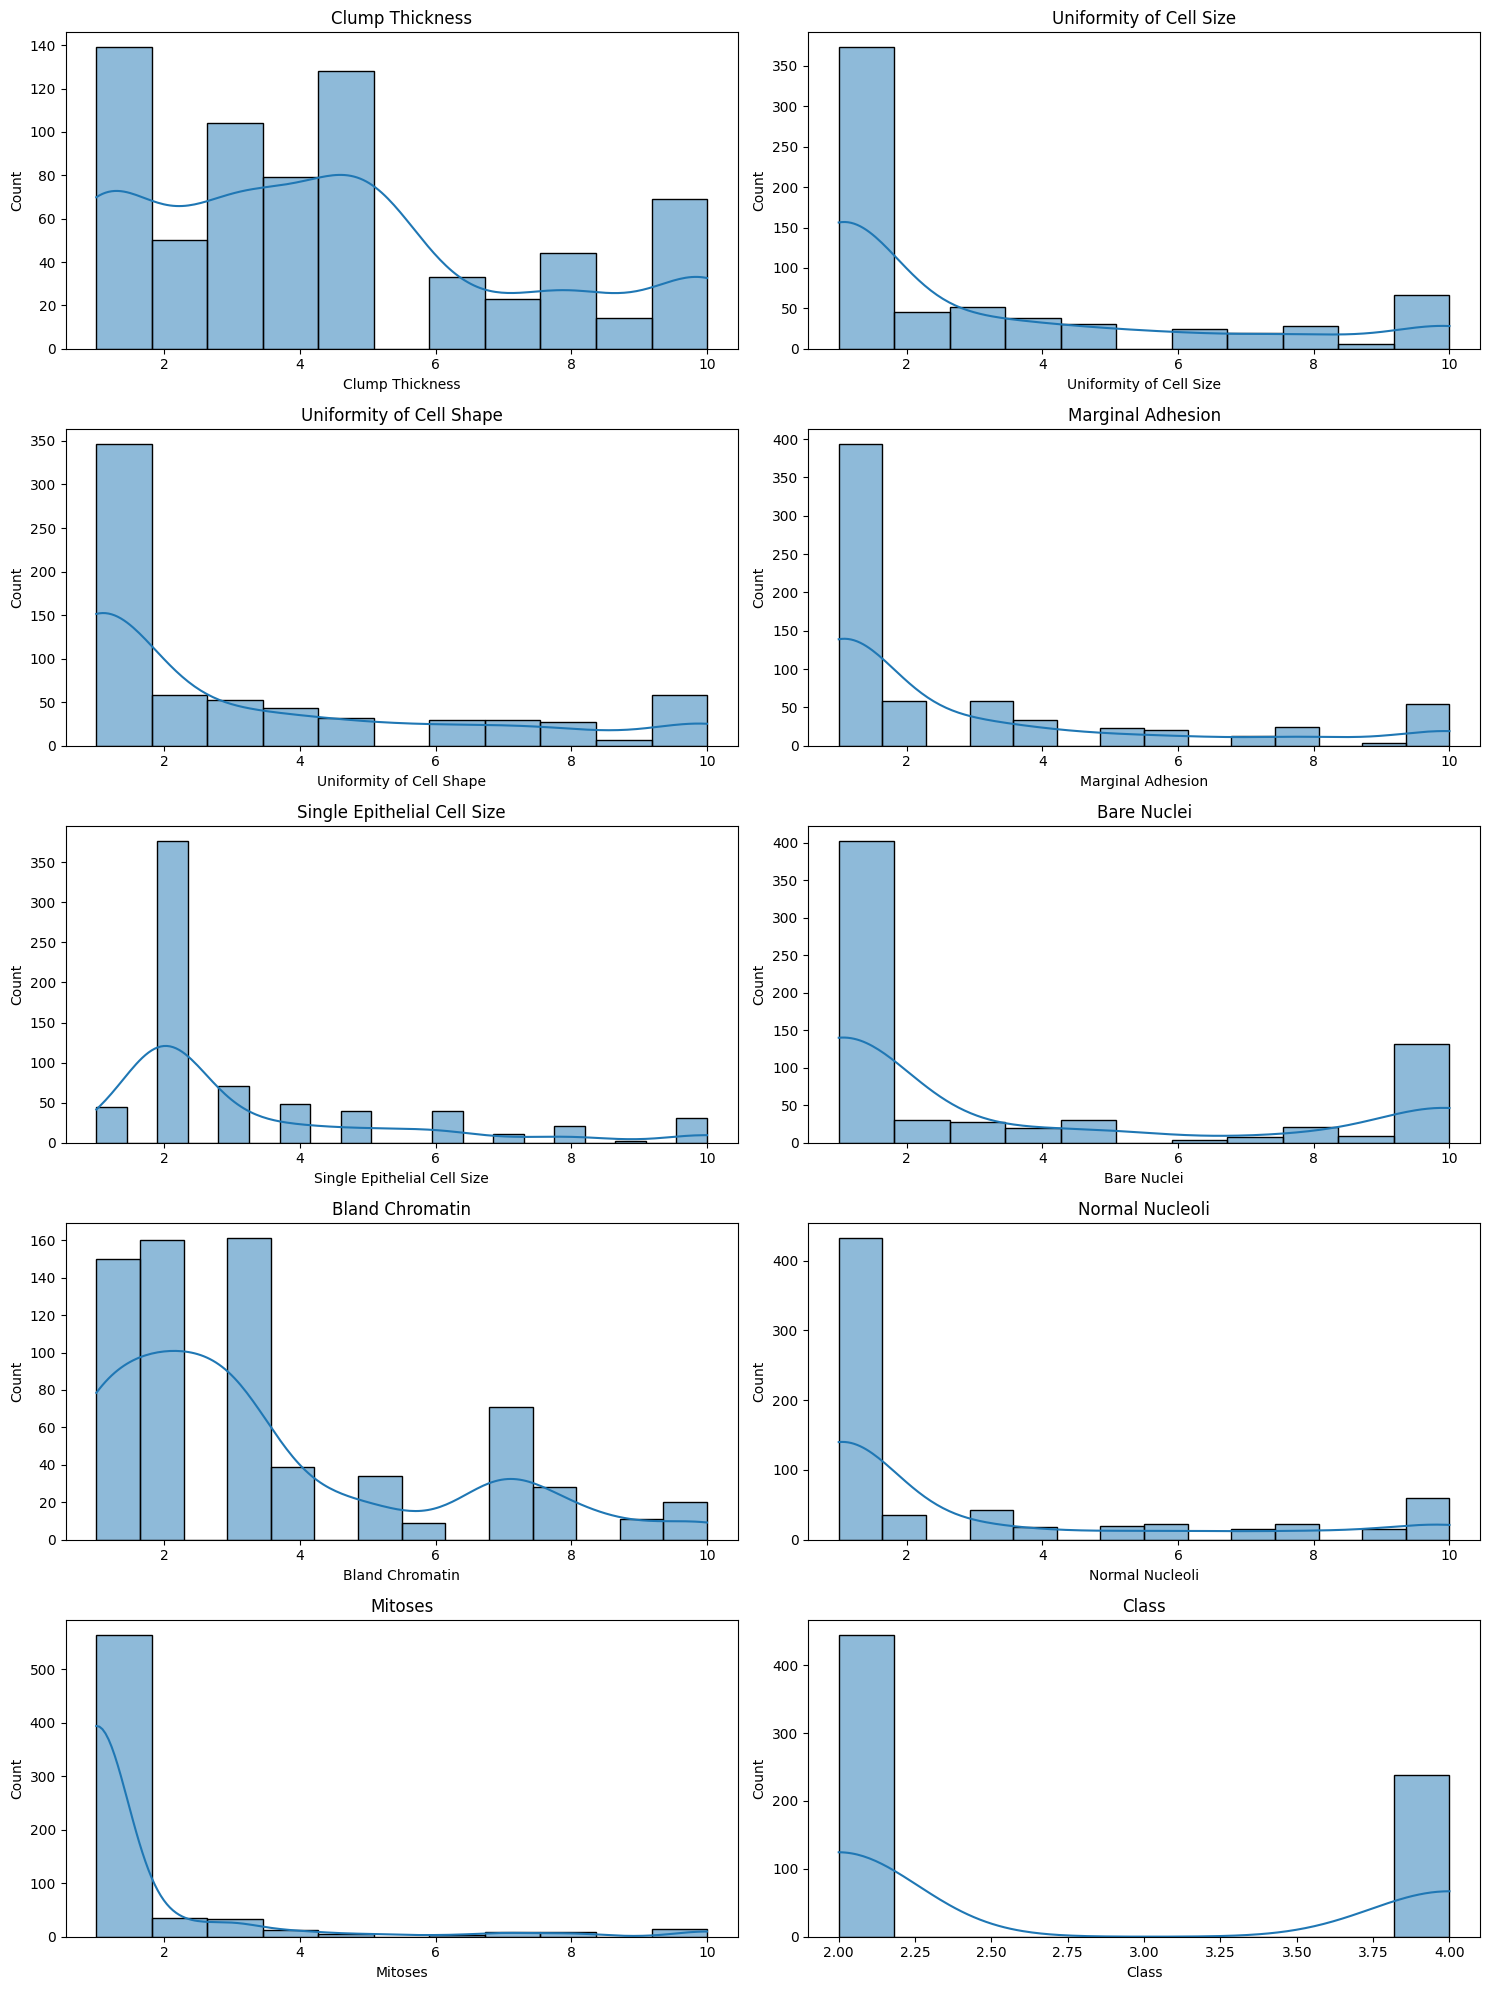

In [18]:
#Plot the features
plt.figure(figsize=(15, 20))

# Enumerate to get both feature name and index
for index, feature in enumerate(data.columns, start=1):
    plt.subplot(5, 2, index)
    sns.histplot(x=feature, data=data, kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

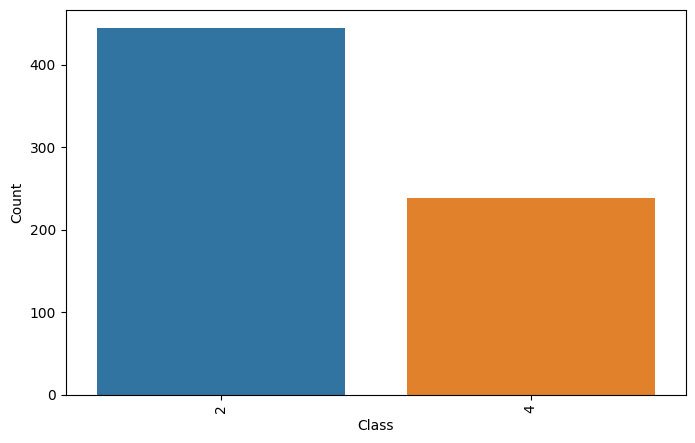

In [28]:
#Plot based in the Class
target = data['Class'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=target.index, y=target.values)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

/var/folders/_n/7lgnxq2s2gs_s1zqbfrw7x6h0000gn/T/ipykernel_5492/3298468388.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[f][data["Class"] == 4])
/var/folders/_n/7lgnxq2s2gs_s1zqbfrw7x6h0000gn/T/ipykernel_5492/3298468388.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[f][data

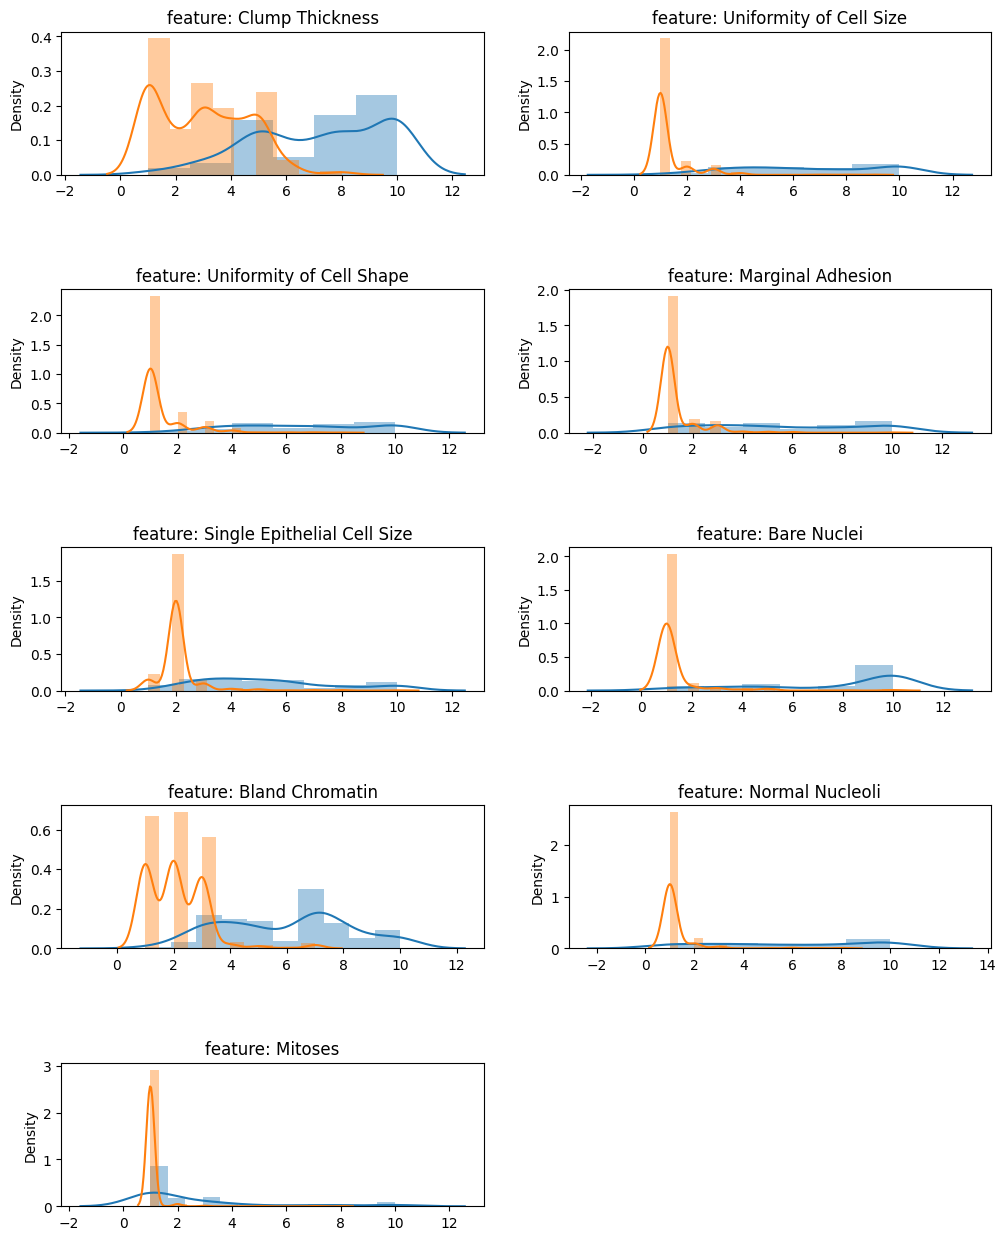

In [32]:
features = data.drop("Class", axis=1)

plt.figure(figsize=(12,32))
gs = gridspec.GridSpec(10, 2)
gs.update(hspace=0.8)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(data[f][data["Class"] == 4])
    sns.distplot(data[f][data["Class"] == 2])
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(f))

plt.show()

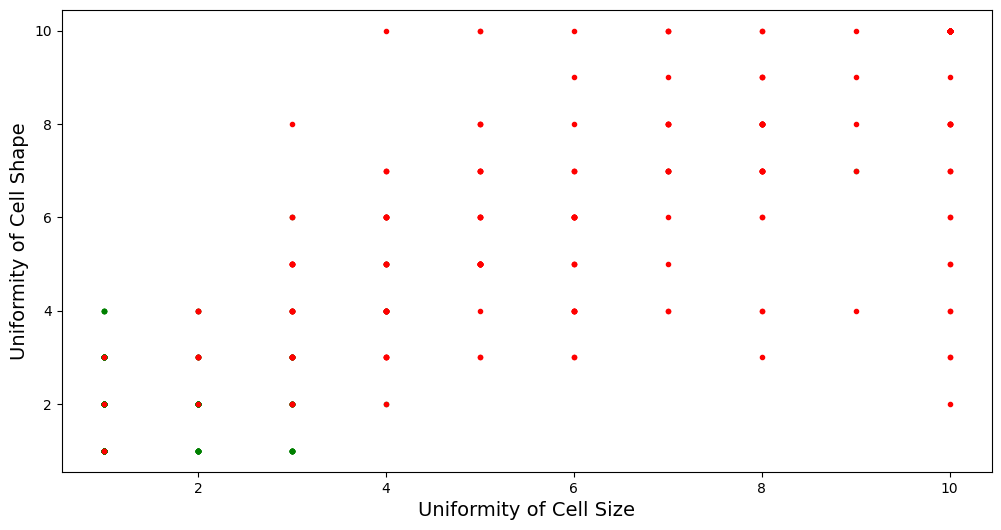

In [38]:
plt.figure(figsize=(12, 6))
plt.scatter(data["Uniformity of Cell Size"][data['Class'] == 2], data["Uniformity of Cell Shape"][data['Class'] == 2], c="g", marker=".")
plt.scatter(data["Uniformity of Cell Size"][data['Class'] == 4], data["Uniformity of Cell Shape"][data['Class'] == 4], c="r", marker=".")
plt.xlabel("Uniformity of Cell Size", fontsize=14)
plt.ylabel("Uniformity of Cell Shape", fontsize=14)
plt.show()

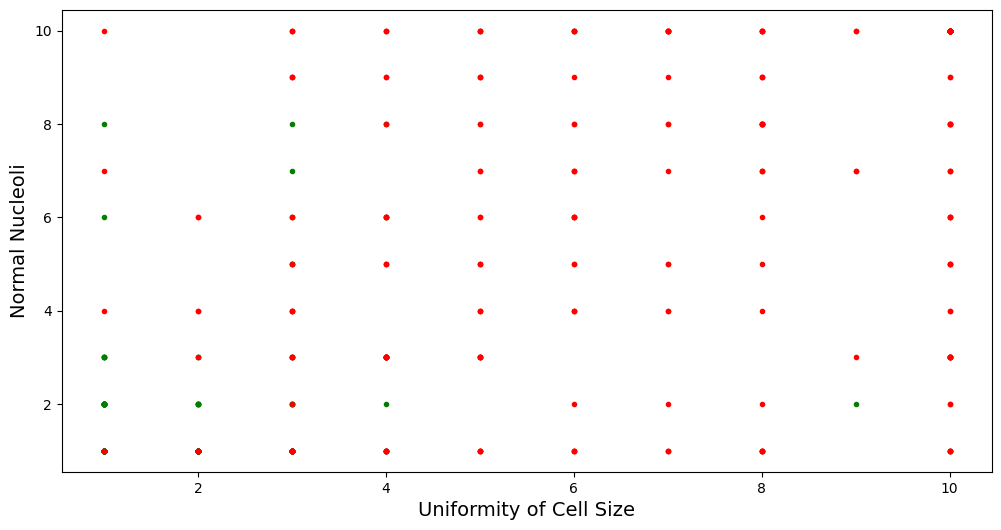

In [37]:
plt.figure(figsize=(12, 6))
plt.scatter(data["Uniformity of Cell Size"][data['Class'] == 2], data["Normal Nucleoli"][data['Class'] == 2], c="g", marker=".")
plt.scatter(data["Uniformity of Cell Size"][data['Class'] == 4], data["Normal Nucleoli"][data['Class'] == 4], c="r", marker=".")
plt.xlabel("Uniformity of Cell Size", fontsize=14)
plt.ylabel("Normal Nucleoli", fontsize=14)
plt.show()